# Spotify

## Introdução

A análise abaixo foi realizada utilizando a base retirada do spotify disponibilizada no www.kaggle.com.

A motivação da análise é entender os fatores que influenciam uma pessoa a gostar ou não de uma música que foi recomendada para elas. Sendo importante para definir quais características em comum podem gerar uma maior aceitação do público para música. Tentando prever a partir dos fatores, quais músicas receberiam um like ou deslike.

Dataset: https://www.kaggle.com/datasets/bricevergnou/spotify-recommendation?select=data.csv

## Carregando as bibliotecas e a base

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [2]:
spotify_df = pd.read_csv('/kaggle/input/spotify-recommendation/data.csv')

In [3]:
spotify_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


Estatística Descritiva da base
* danceability: "Danceabilidade" da música.
* energy: Percepção de intensidade da música.
* key: Classe de notas.
* loudness: Sonoridade das músicas em dB.
* mode: Modalidade da música.
* speechiness: Detecta a presença de palavras cantadas durante a música.
* acousticness: Medida de acústica da música.
* instrumentalness: Partes da música que não possui vocais.
* liveness: Detecta a presença de público durante a gravação.
* valence: Descreve a positividade da música.
* tempo: Tempo estimado de batidas por minuto.
* duration_ms: Duração da música em milisegundos.
* time_signature: Verificar quantas batidas há em cada compasso.
* liked: Variável para ser predita, se a música recebeu um like (1) ou deslike (0)




In [4]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [5]:
spotify_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.636656,0.638431,5.497436,-9.481631,0.538462,0.148957,0.319093,0.192337,0.148455,0.493632,121.086174,213408.933333,3.912821,0.512821
std,0.216614,0.260096,3.415209,6.525086,0.499802,0.120414,0.320782,0.346226,0.105975,0.267695,28.084829,72152.392864,0.451332,0.501122
min,0.130000,0.002400,0.000000,-42.261000,0.000000,0.027800,0.000003,0.000000,0.033100,0.035300,60.171000,77203.000000,1.000000,0.000000
25%,0.462500,0.533500,2.000000,-9.962000,0.000000,0.056800,0.042200,0.000000,0.084000,0.269000,100.242000,178300.500000,4.000000,0.000000
50%,0.705000,0.659000,6.000000,-7.766000,1.000000,0.096200,0.213000,0.000008,0.105000,0.525000,124.896000,204000.000000,4.000000,1.000000
75%,0.799000,0.837500,8.000000,-5.829000,1.000000,0.230500,0.504000,0.097500,0.177000,0.717500,142.460500,242373.500000,4.000000,1.000000
max,0.946000,0.996000,11.000000,-2.336000,1.000000,0.540000,0.995000,0.969000,0.633000,0.980000,180.036000,655213.000000,5.000000,1.000000


In [6]:
spotify_df.shape

(195, 14)

## Análise exploratória dos dados

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'time_signature'}>,
        <AxesSubplot:title={'center':'liked'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

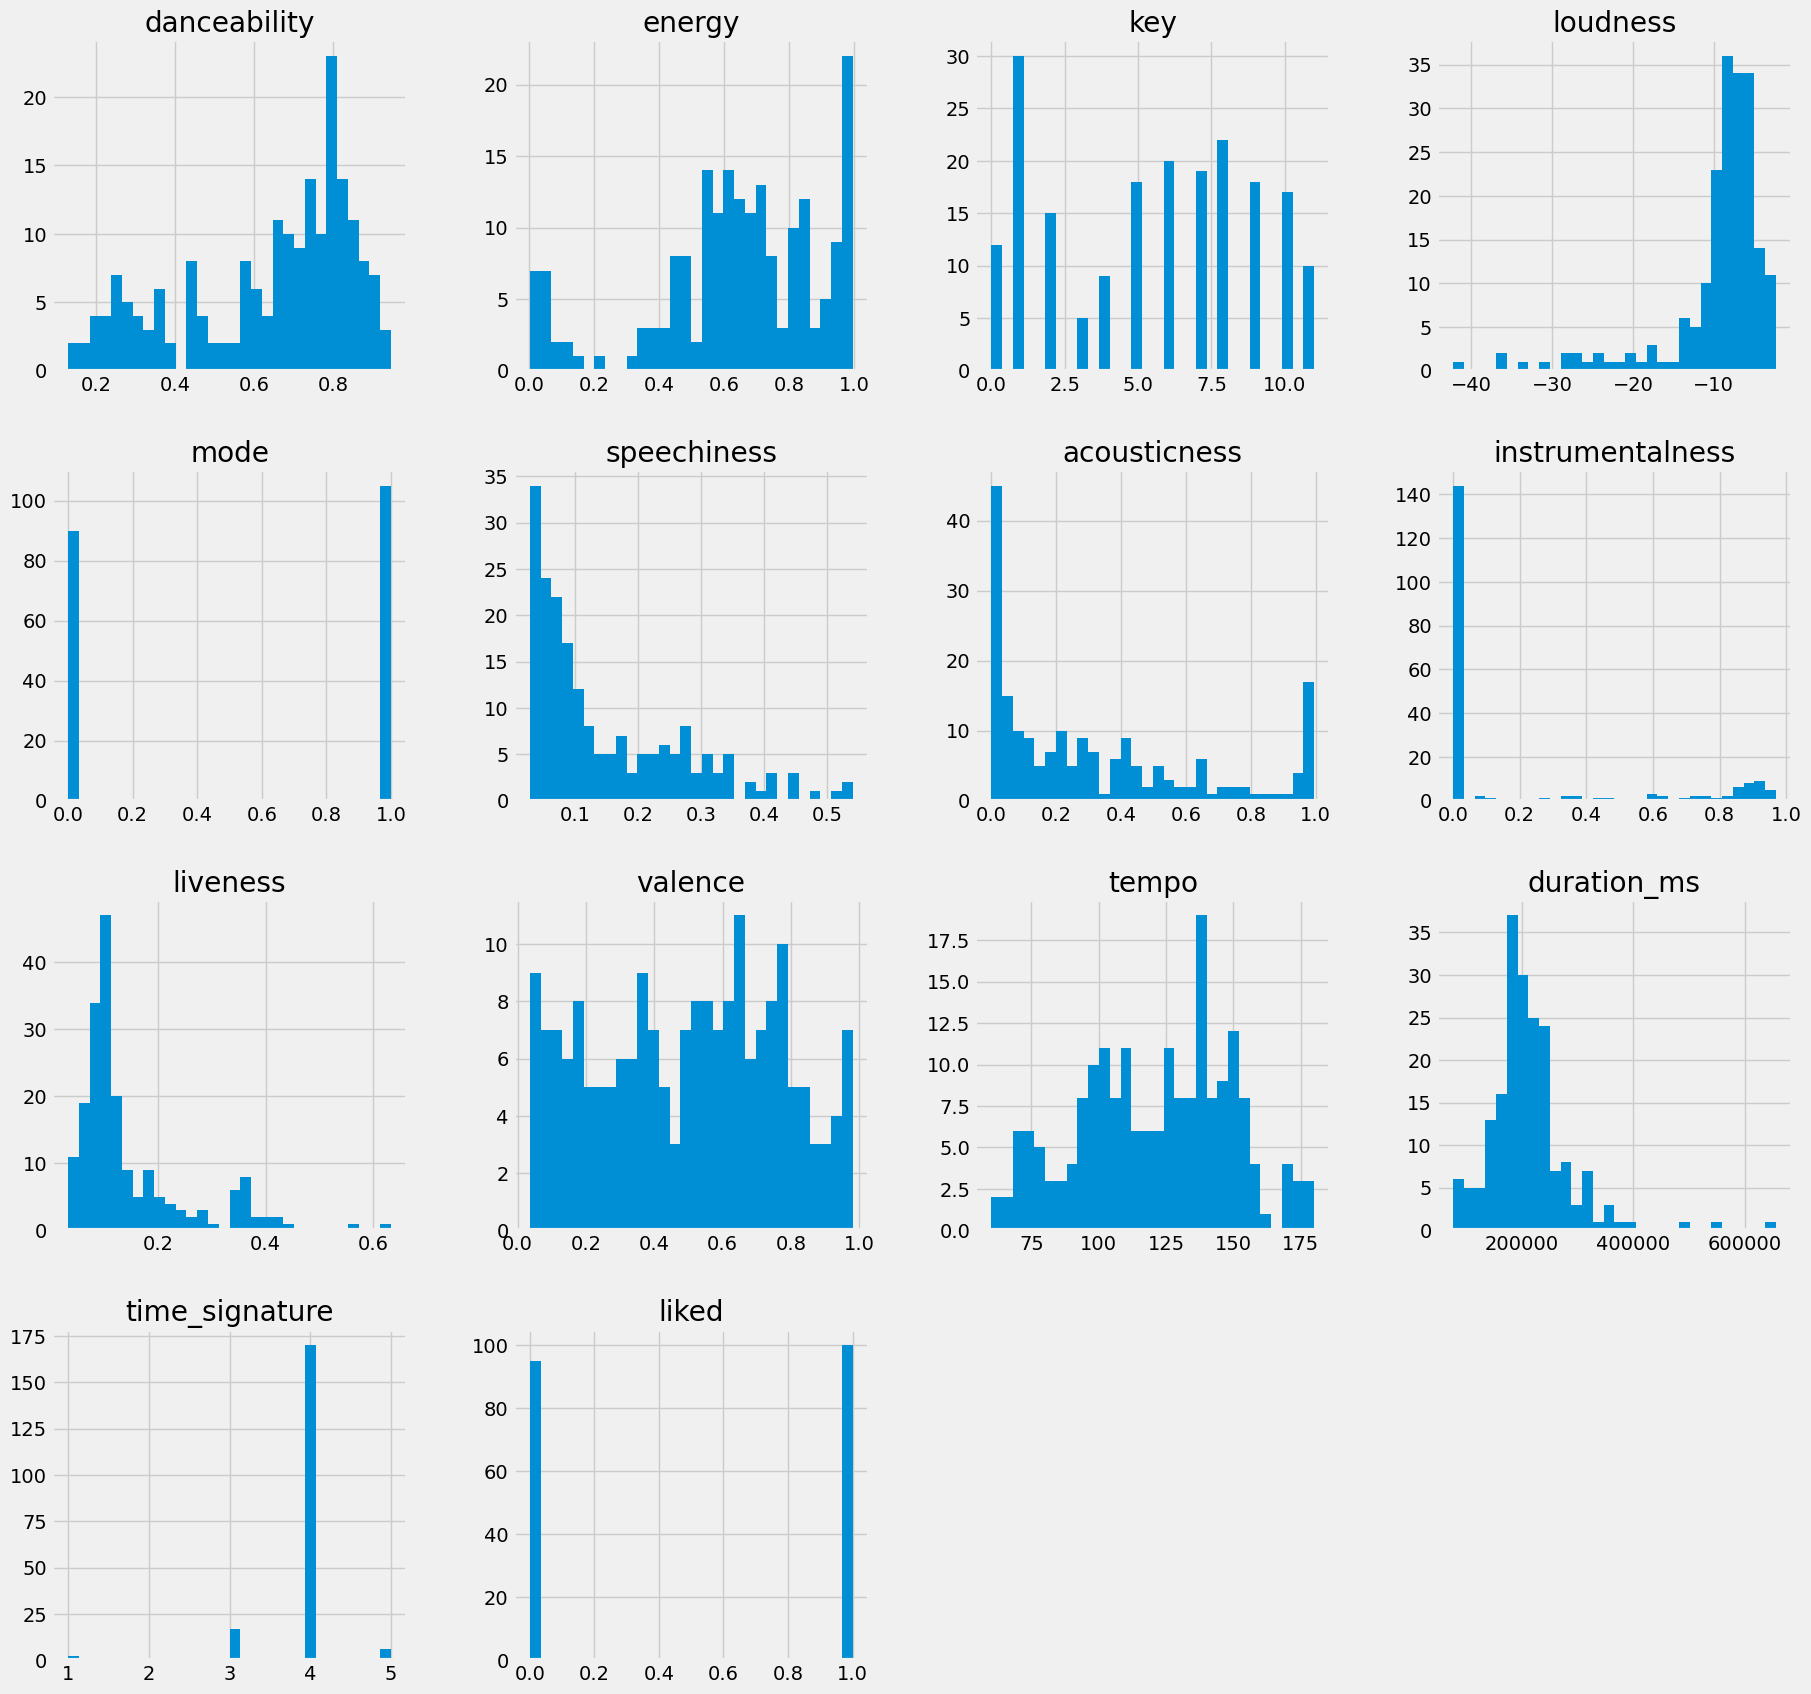

In [7]:
spotify_df.hist(bins=30, figsize=(20,20))

<AxesSubplot:>

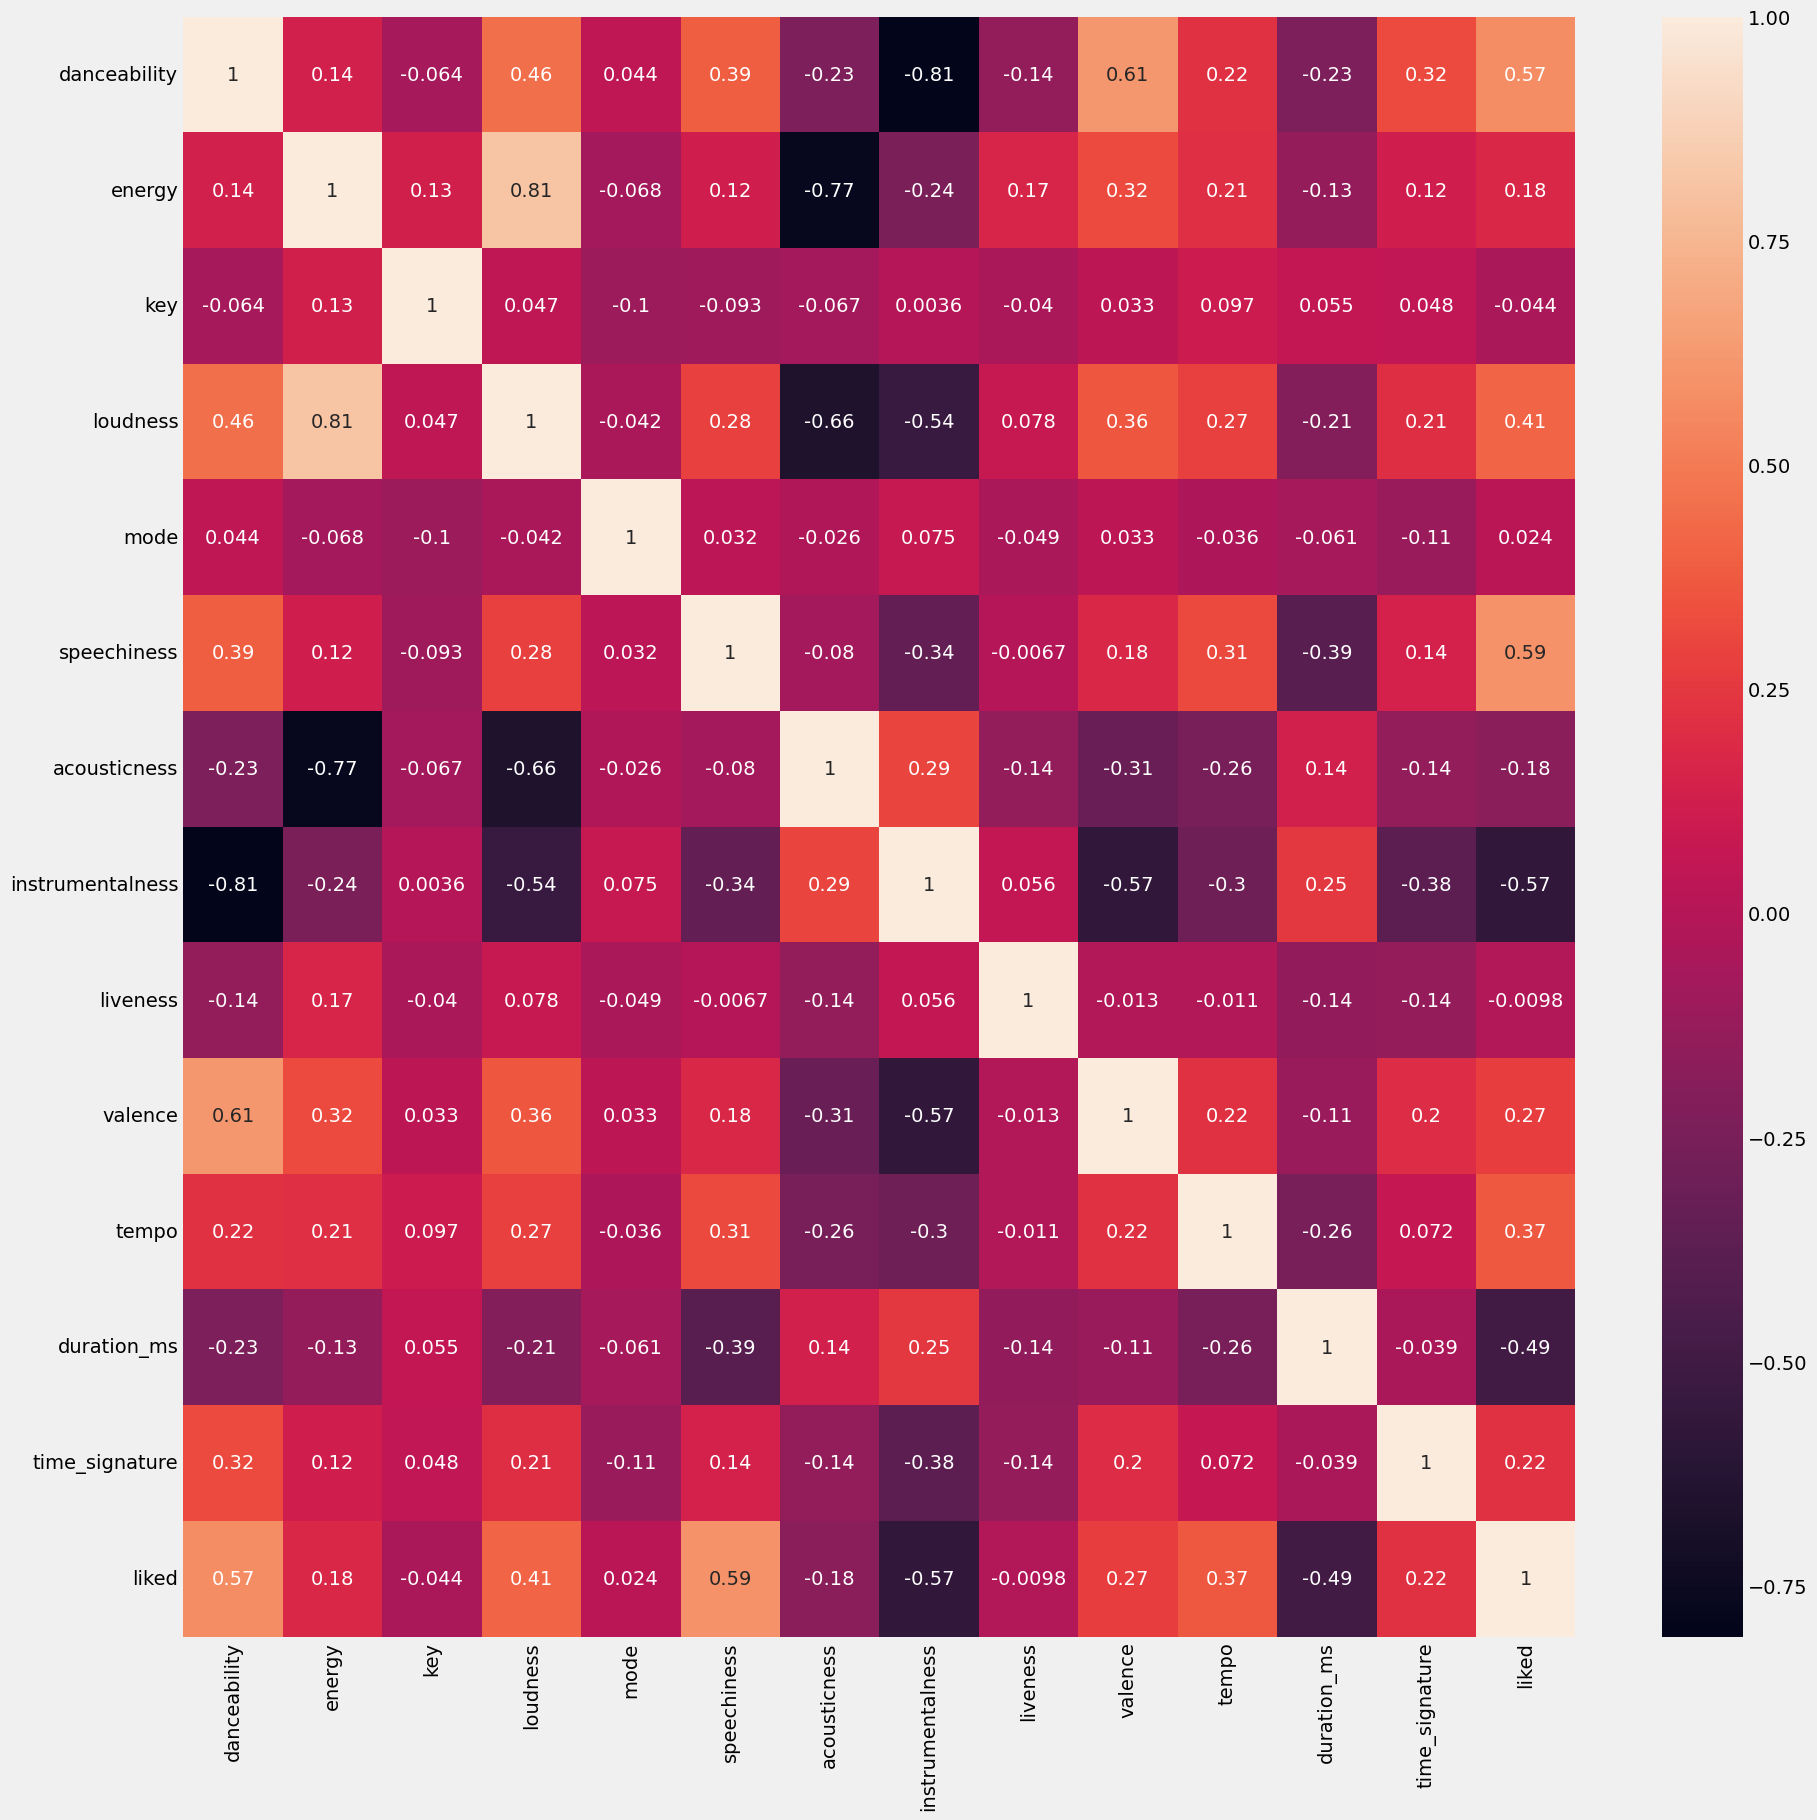

In [8]:
correlations = spotify_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlations, annot=True)

<AxesSubplot:xlabel='liked', ylabel='count'>

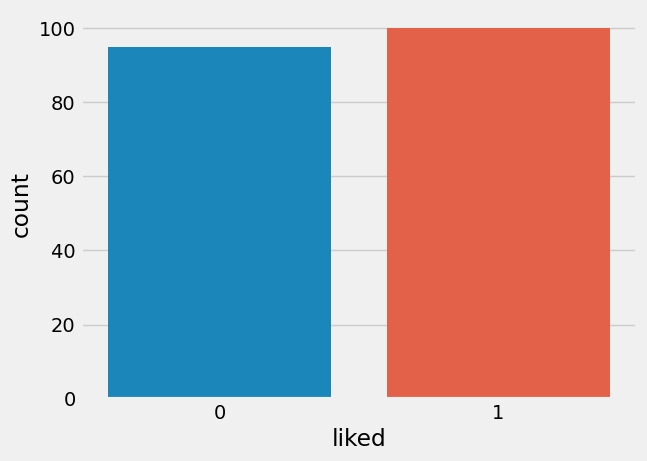

In [9]:
sns.countplot(data=spotify_df, x='liked')

Existe uma quantidade bem próxima de músicas que receberam like e deslike em relação ao total de músicas da base.

<AxesSubplot:xlabel='liked', ylabel='danceability'>

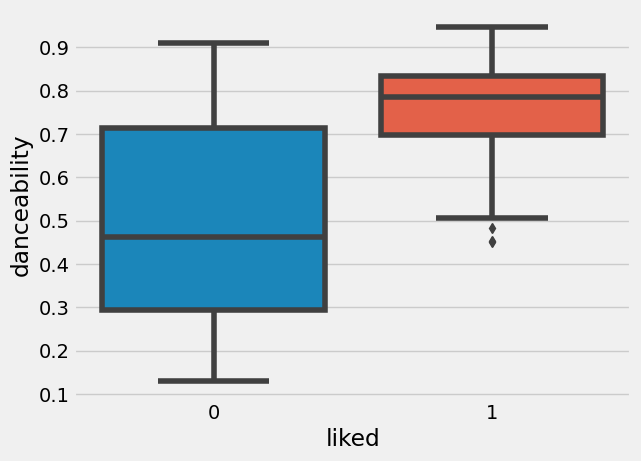

In [10]:
sns.boxplot(data=spotify_df, x='liked', y='danceability')

Podemos observar que músicas que possuem uma danceabilidade maior, receberam mais likes.

<AxesSubplot:xlabel='liked', ylabel='loudness'>

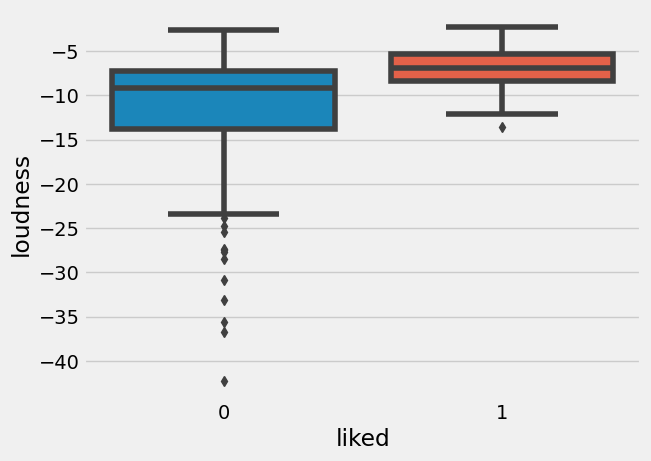

In [11]:
sns.boxplot(data=spotify_df, x='liked', y='loudness')

Sendo um pouco mais equilibrado no quesito sonoridade mas prevalece mais likes nas músicas onde a qualidade sonora é maior.

<AxesSubplot:xlabel='liked', ylabel='duration_ms'>

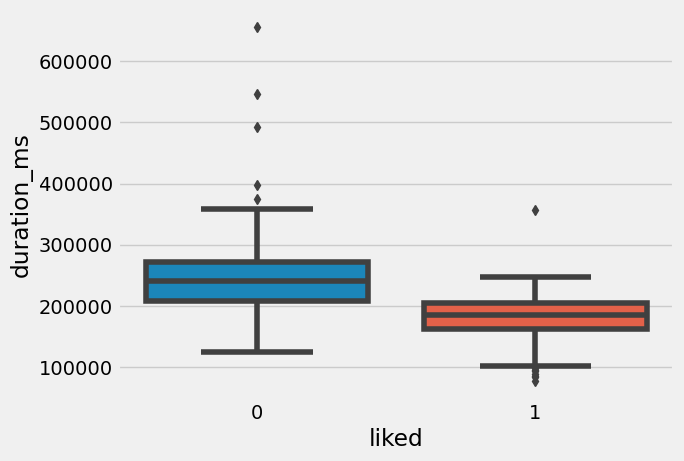

In [12]:
sns.boxplot(data=spotify_df, x='liked', y='duration_ms')

Músicas mais curtas foram as que geraram mais likes, ou seja, quanto maior a duração da música, menor a chance do usuário gostar dela.

<AxesSubplot:xlabel='loudness', ylabel='energy'>

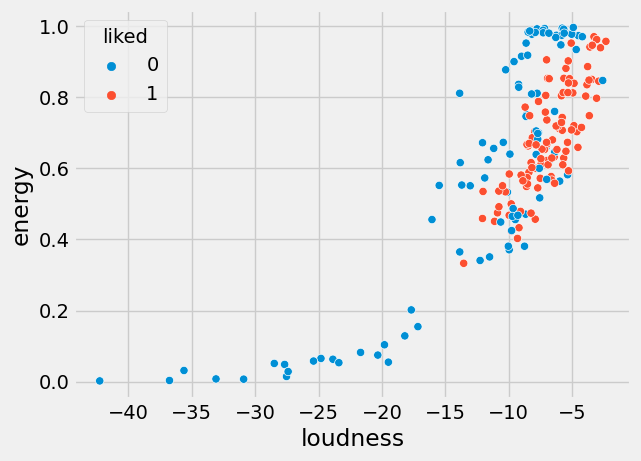

In [13]:
sns.scatterplot(data=spotify_df, x='loudness', y='energy', hue='liked')

Conforme esperado essa curva relacionando a intensidade da música com sua sonoridade enquanto aumentam, os likes aparecem a partir de uma maior intensidade e uma maior sonoridade da música

<AxesSubplot:xlabel='danceability', ylabel='valence'>

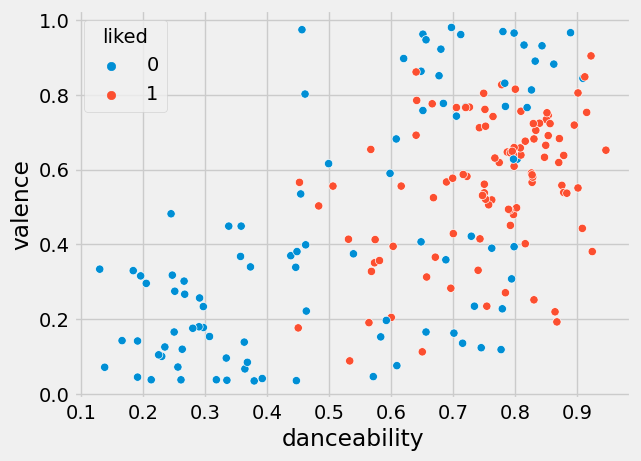

In [14]:
sns.scatterplot(data=spotify_df, x='danceability', y='valence', hue='liked')

Quanto mais positiva é a música, mais dançavel ela é. Também é perceptível que a quantidade de likes está diretamente ligada a isso.

## Aplicando modelo para prever os resultados

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler    
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
X = spotify_df.drop(['liked'], axis=1)
y = spotify_df['liked']

standard_scaler = StandardScaler()

X_scaled = standard_scaler.fit_transform(X)
X_scaled

array([[ 0.7699031 , -0.05562809,  0.44109502, ..., -0.89667019,
         1.2660647 ,  0.19365754],
       [ 0.58013908,  0.24888794,  1.32177961, ...,  1.07961031,
         0.46922891,  0.19365754],
       [-1.73868457, -2.40348527, -1.32027416, ..., -1.63462056,
         1.02238407,  0.19365754],
       ...,
       [-0.63712763, -1.107943  ,  1.02821808, ..., -1.08601272,
         0.31317159,  0.19365754],
       [-0.28999834,  0.34910841,  1.32177961, ..., -0.37622812,
        -0.32195152,  2.41502349],
       [ 0.51071323,  0.10626651,  1.61534113, ..., -1.55569214,
        -0.50295078,  0.19365754]])

Dividindo a base e transformando a escala para obter melhores resultados

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [18]:
X_train.shape, X_test.shape

((136, 13), (59, 13))

In [19]:
y_train.shape, y_test.shape

((136,), (59,))

In [20]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8813559322033898


Aplicando o modelo de arvore de decisão e verificando o resultado

<AxesSubplot:>

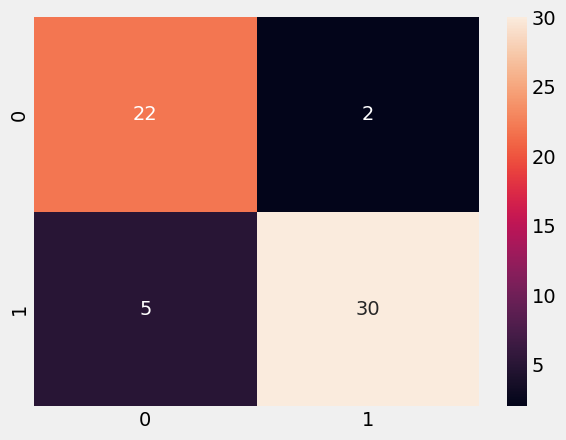

In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        24
           1       0.94      0.86      0.90        35

    accuracy                           0.88        59
   macro avg       0.88      0.89      0.88        59
weighted avg       0.89      0.88      0.88        59



Como é um valor binário, precisamos olhar além da precisão por causa dos falsos positivos, mesmo assim o modelo obteve uma boa acurácia no recall também e um macro de 88%, sendo bem confiável.

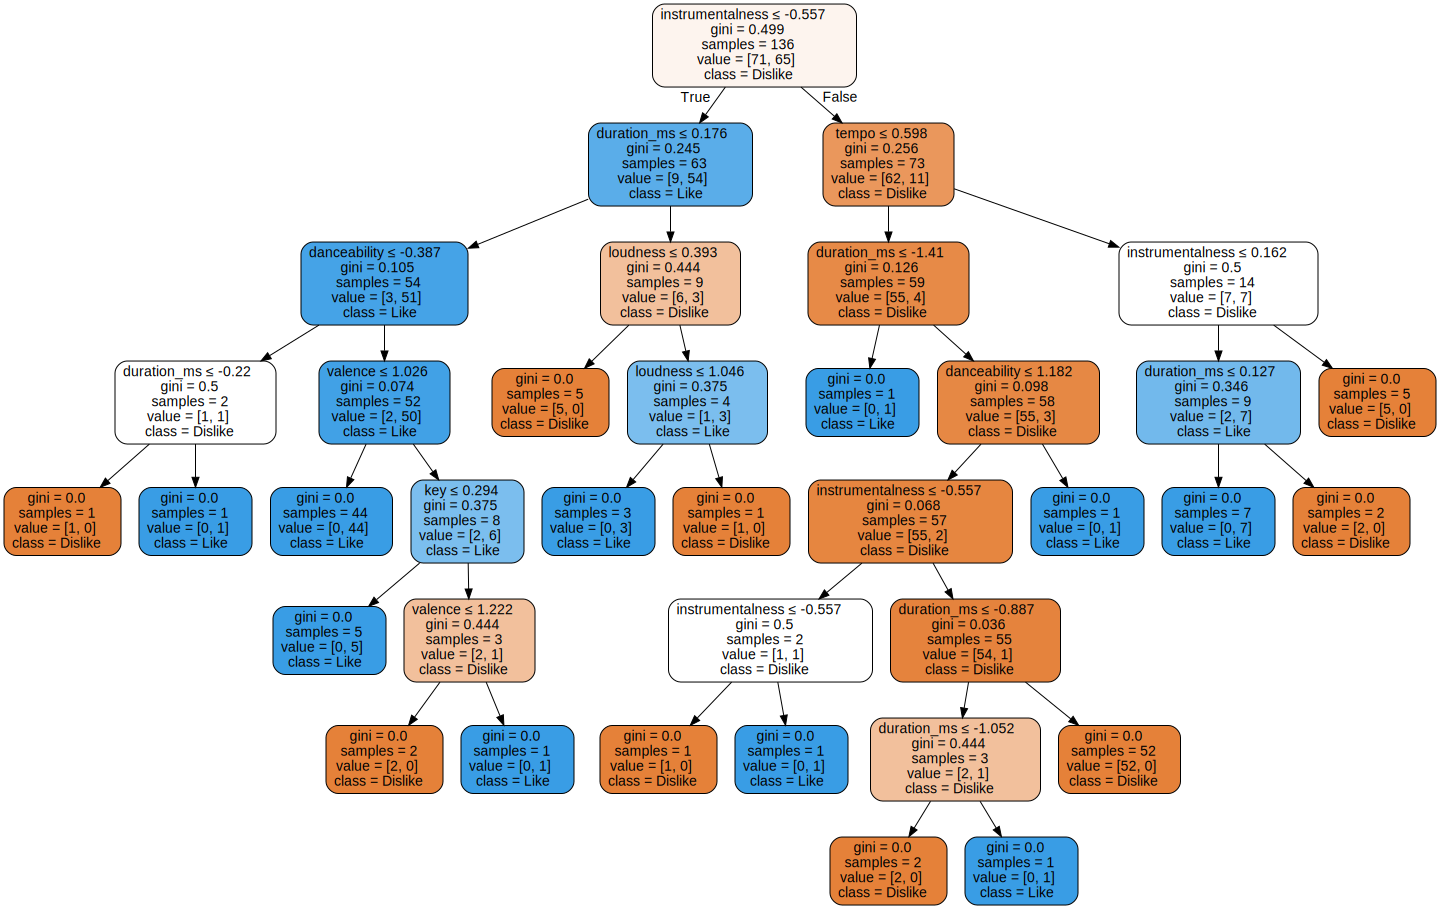

In [23]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(decision_tree, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('Liked')
dot_data = tree.export_graphviz(decision_tree, out_file=None,
                                feature_names=list(X.columns),
                                class_names=['Dislike', 'Like'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data, format='png')
graph

Plotagem da árvore de decisão